#  PyTorch Lightning

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* https://lightning.ai/docs/pytorch/stable/starter/introduction.html
* https://lightning.ai/docs/pytorch/stable/levels/core_skills.html
* https://lightning.ai/docs/pytorch/stable/api/lightning.pytorch.core.LightningModule.html#lightning.pytorch.core.LightningModule.log
* https://lightning.ai/docs/pytorch/stable/extensions/logging.html
* https://lightning.ai/docs/pytorch/stable/common/progress_bar.html
* https://lightning.ai/docs/pytorch/stable/common/early_stopping.html
* https://lightning.ai/docs/pytorch/1.6.3/api/pytorch_lightning.utilities.model_summary.html#pytorch_lightning.utilities.model_summary.ModelSummary
* https://torchmetrics.readthedocs.io/en/stable/pages/lightning.html
* https://pytorch-lightning.readthedocs.io/en/2.1.2/pytorch/
* https://www.youtube.com/watch?v=XbIN9LaQycQ&list=PLhhyoLH6IjfyL740PTuXef4TstxAK6nGP
* https://pytorch-lightning.readthedocs.io/en/2.1.2/pytorch/data/datamodule.html

## Задачи для совместного разбора

1\. Создайте датасет для классификации и обучите модель при помощи PyTorch Lightning.

In [1]:
!pip install pytorch_lightning

In [2]:
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader, Dataset
from typing import Any, List, Optional, Union
import pytorch_lightning as pl

class MyLightningModule(pl.LightningModule):
    """
    Класс модуля PyTorch Lightning.

    Этот класс определяет структуру модели, шаги обучения, валидации и тестирования,
    а также настройки оптимизатора для обучения.
    """

    def __init__(self, n_inp, n_out):
        """Здесь определяется архитектура модели и инициализируются все необходимые слои."""
        super().__init__()
        self.fc = nn.Linear(n_inp,n_out)
        self.criterion = nn.CrossEntropyLoss()
        

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Определяет прямой проход модели.

        Args:
            x (torch.Tensor): Входной тензор.

        Returns:
            torch.Tensor: Выходной тензор модели.
        """
        return self.fc(x)

    def training_step(self, batch: Any, batch_idx: int) -> torch.Tensor:
        """
        Выполняет один шаг обучения.

        Args:
            batch (Any): Батч данных для обучения.
            batch_idx (int): Индекс текущего батча.

        Returns:
            torch.Tensor: Значение функции потерь для этого шага.
        """
        x,y = batch
        y_pred = self(x)
        loss = self.criterion(y_pred, y)
        self.log('train_loss', loss, True, True,True,True)
        return loss
        

    def validation_step(self, batch: Any, batch_idx: int) -> None:
        """
        Выполняет один шаг валидации.

        Args:
            batch (Any): Батч данных для валидации.
            batch_idx (int): Индекс текущего батча.
        """
        x,y = batch
        y_pred = self(x)
        loss = self.criterion(y_pred, y)
        self.log('val_loss', loss, True, True,True,True)
        return loss

    def test_step(self, batch: Any, batch_idx: int) -> None:
        """
        Выполняет один шаг тестирования.

        Args:
            batch (Any): Батч данных для тестирования.
            batch_idx (int): Индекс текущего батча.
        """
        x,y = batch
        y_pred = self(x)
        loss = self.criterion(y_pred, y)
        self.log('test_loss', loss, True, True,True,True)
        return loss

    def configure_optimizers(self) -> torch.optim.Optimizer:
        """
        Настраивает оптимизатор для обучения модели.

        Returns:
            torch.optim.Optimizer: Настроенный оптимизатор.
        """
        return optim.Adam(self.parameters(), lr=0.001)

In [3]:
# model = MyLightningModule(5,3)
# trainer = pl.Trainer(max_epochs=10,)
# trainer.fit(model,data)

In [4]:
class MyDataModule(pl.LightningDataModule):
    """
    Класс модуля данных PyTorch Lightning.

    Этот класс отвечает за загрузку, подготовку и предоставление данных
    для обучения, валидации и тестирования модели.
    """

    def __init__(self):
        """
        Инициализирует модуль данных.

        Args:
            data_dir (str): Путь к директории с данными.
        """
        super().__init__()

    def prepare_data(self) -> None:
        """
        Подготавливает данные для использования.

        Здесь можно выполнить загрузку данных или другие подготовительные операции.
        """
        pass

    def setup(self, stage: Optional[str] = None) -> None:
        """
        Настраивает данные для использования на каждом этапе (обучение/валидация/тестирование).

        Args:
            stage (Optional[str]): Этап, на котором вызывается метод ("fit" или "test").
        """

    def train_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для обучающих данных.

        Returns:
            DataLoader: DataLoader с обучающими данными.
        """

    def val_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для данных валидации.

        Returns:
            DataLoader: DataLoader с данными валидации.
        """
        

    def test_dataloader(self) -> DataLoader:
        """
        Возвращает DataLoader для тестовых данных.

        Returns:
            DataLoader: DataLoader с тестовыми данными.
        """

## Задачи для самостоятельного решения

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch as th
from tqdm.notebook import tqdm
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchmetrics
import pytorch_lightning as pl

<p class="task" id="1"></p>

1\. Загрузите набор данных из файла `Walmart.csv`. Выполните следующую процедуру предобработки:
- замените цены `Weekly_Sales` на логарифм цены;
- удалите столбец с датами;
- закодируйте столбцы `Store` и `Holiday_Flag` при помощи `TargetEncoder` (см. пакет [category_encoders](https://contrib.scikit-learn.org/category_encoders/));
- после кодирование выполните стандартизацию признаков;
- разбейте выборку на обучающее, валидационное и тестовое множество.

Все преобразования допускается делать при помощи `numpy`, `pandas` и `sklearn`.

- [ ] Проверено на семинаре

In [6]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [7]:
df = pd.read_csv('Walmart.csv')

df['Weekly_Sales'] = np.log1p(df['Weekly_Sales'])

df = df.drop('Date', axis=1)

X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

categorical_features = ['Store', 'Holiday_Flag']
encoder = TargetEncoder(cols=categorical_features)

encoder.fit(X_train, y_train)

X_train = encoder.transform(X_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train, columns=X.columns).head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1.315477,3.684569,-0.567131,-1.165268,-1.151924,0.938433
1,0.024362,-0.271402,0.259173,1.157092,1.361419,-1.238631
2,-1.800622,-0.271402,0.265141,-1.208963,1.003828,-0.819842
3,0.198987,-0.271402,-0.188431,1.069703,-0.928323,-0.098949
4,0.741406,-0.271402,1.414805,0.604357,1.380970,-0.889640


<p class="task" id="2"></p>

2\. В ячейках ниже представлен шаблонный код для обучения модели. В данной версии все реализовано "с нуля": обучение, метрики, визуализация, логирование, логика ранней остановки.

Используя набор данных из предыдущего задания, обучите модель, используя предложенную реализацию. Визуализируйте динамику изменения среднего значения функции потерь и метрик на обучающем и валидационном множестве. Интегрируйте реализацию ранней остановки в цикл обучения. Посчитайте и выведите на экран значения метрик на тестовом множестве.

- [ ] Проверено на семинаре

In [8]:
def r2_score(y_true, y_pred):
    total_sum_squares = torch.sum((y_true - y_true.mean())**2)
    residual_sum_squares = torch.sum((y_true - y_pred)**2)
    r2 = 1 - (residual_sum_squares / total_sum_squares)
    return r2

def mape_score(y_true, y_pred):
    return torch.mean(torch.abs((y_true - y_pred) / y_true)) * 100

In [9]:
class RegressionModel(nn.Module):
    def __init__(self, n_inputs, h_hidden):
        super().__init__()
        self.fc1 = nn.Linear(n_inputs, h_hidden)
        self.fc2 = nn.Linear(h_hidden, 1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = out.relu()
        out = self.fc2(out)
        return out

In [10]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

In [11]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping):
    train_losses, val_losses = [], []
    train_r2s, val_r2s = [], []
    train_mapes, val_mapes = [], []
    
    for epoch in tqdm(range(num_epochs), desc ='Training model'):
        model.train()
        train_loss, train_r2, train_mape = 0.0, 0.0, 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).flatten()
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_r2 += r2_score(targets, outputs).item()
            train_mape += mape_score(targets, outputs).item()
        
        train_loss /= len(train_loader)
        train_r2 /= len(train_loader)
        train_mape /= len(train_loader)
        train_losses.append(train_loss)
        train_r2s.append(train_r2)
        train_mapes.append(train_mape)
        
        model.eval()
        val_loss, val_r2, val_mape = 0.0, 0.0, 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs).flatten()
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                val_r2 += r2_score(targets, outputs).item()
                val_mape += mape_score(targets, outputs).item()
                
        val_loss /= len(val_loader)
        val_r2 /= len(val_loader)
        val_mape /= len(val_loader)
        val_losses.append(val_loss)
        val_r2s.append(val_r2)
        val_mapes.append(val_mape)
        
        # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        
        # Логика ранней остановки
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Ранняя остановка!")
            break
    
    return train_losses, val_losses, train_r2s, val_r2s, train_mapes, val_mapes

In [12]:
def plot_metrics(history):
    train_losses, val_losses, train_r2s, val_r2s, train_mapes, val_mapes = history
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(18, 5))
    
    # График функции потерь
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, 'b-', label='Train Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    
    # График R2
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_r2s, 'b-', label='Train R2')
    plt.plot(epochs, val_r2s, 'r-', label='Validation R2')
    plt.title('R2 Score vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.grid(True)
    
    # График MAPE
    plt.subplot(1, 3, 3)
    plt.plot(epochs, train_mapes, 'b-', label='Train MAPE')
    plt.plot(epochs, val_mapes, 'r-', label='Validation MAPE')
    plt.title('MAPE vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAPE (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [13]:
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss, test_r2, test_mape = 0.0, 0.0, 0.0
    with th.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs).flatten()
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            test_r2 += r2_score(targets, outputs).item()
            test_mape += mape_score(targets, outputs).item()
            
    test_loss /= len(test_loader)
    test_r2 /= len(test_loader)
    test_mape /= len(test_loader)
    
    print("\n--- Метрики на тестовом множестве ---")
    print(f"MSE: {test_loss:.4f}")
    print(f"R2 Score: {test_r2:.4f}")
    print(f"MAPE: {test_mape:.2f}%")

In [14]:
batch_size = 32
learning_rate = 0.01
patience = 5
num_epochs = 100
n_inputs = X_train.shape[1]
h_hidden = 128

Training model:   0%|          | 0/100 [00:00<?, ?it/s]

Ранняя остановка!


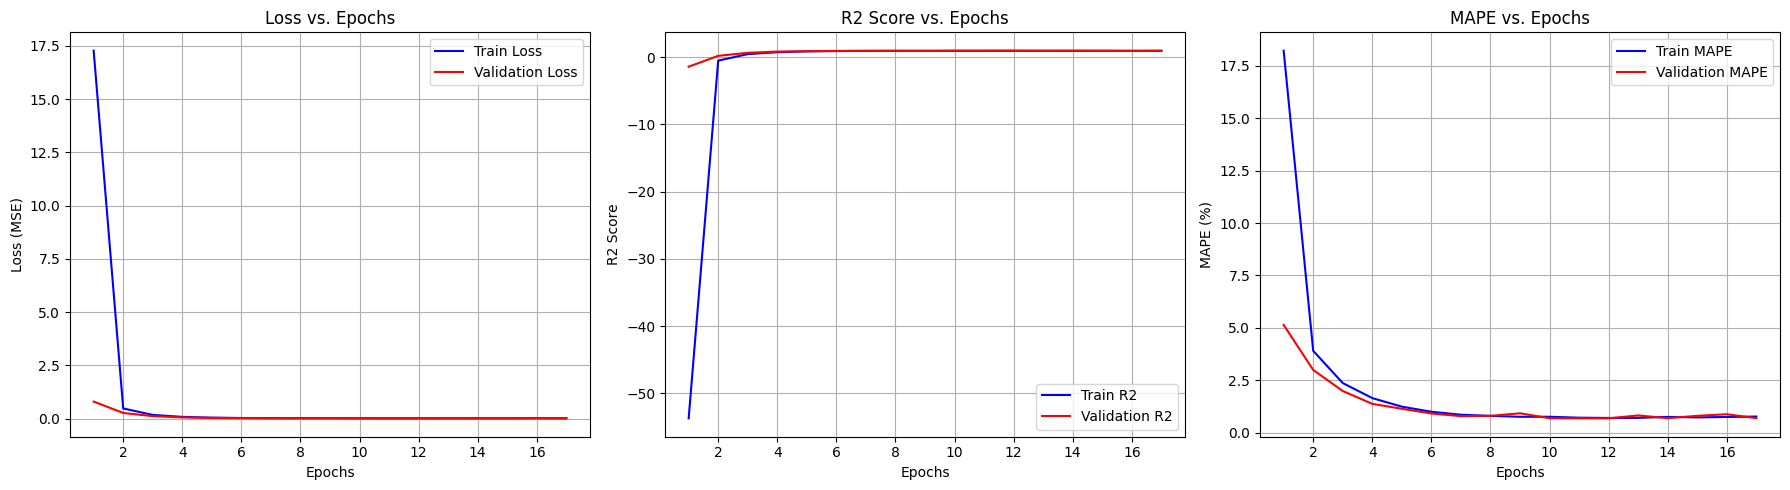


--- Метрики на тестовом множестве ---
MSE: 0.0219
R2 Score: 0.9285
MAPE: 0.73%


In [15]:
X_train_tensor = th.tensor(X_train, dtype=th.float32)
y_train_tensor = th.tensor(y_train.values, dtype=th.float32)
X_val_tensor = th.tensor(X_val, dtype=th.float32)
y_val_tensor = th.tensor(y_val.values, dtype=th.float32)
X_test_tensor = th.tensor(X_test, dtype=th.float32)
y_test_tensor = th.tensor(y_test.values, dtype=th.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = RegressionModel(n_inputs=n_inputs, h_hidden=h_hidden)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=patience)

history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping)


plot_metrics(history)


evaluate_model(model, test_loader, criterion)

<p class="task" id="3"></p>

3\. Перепишите логику обучения модели, используя `pytorch_lightning`. Для расчета метрик $R^2$ и MAPE можно использовать `torchmetrics`. Ранняя остановка в данном задании не требуется. После завершения обучения посчитайте значения метрик на тестовом множестве.

В процессе обучения настройки progressbar так, что:
* для каждого батча во время обучения рассчитывается значение функции потерь и метрик, по завершению эпохи показатели усредняются;
* для каждого батча во время валидации рассчитывается значение функции потерь и метрик, по завершению эпохи показатели усредняются.

- [ ] Проверено на семинаре

In [16]:
class RegressionLightningModule(pl.LightningModule):
    """
    Класс LightningModule для модели регрессии.
    """
    def __init__(self, n_inputs, h_hidden, learning_rate=0.001):
        super().__init__()
        self.save_hyperparameters()

        self.fc1 = nn.Linear(n_inputs, h_hidden)
        self.fc2 = nn.Linear(h_hidden, 1)
        
        self.criterion = nn.MSELoss()

        self.train_r2 = torchmetrics.R2Score()
        self.val_r2 = torchmetrics.R2Score()
        self.test_r2 = torchmetrics.R2Score()

        self.train_mape = torchmetrics.MeanAbsolutePercentageError()
        self.val_mape = torchmetrics.MeanAbsolutePercentageError()
        self.test_mape = torchmetrics.MeanAbsolutePercentageError()

    def forward(self, x):
        """Прямой проход"""
        out = self.fc1(x)
        out = torch.relu(out)
        out = self.fc2(out)
        return out.flatten()

    def training_step(self, batch, batch_idx):
        """Один шаг обучения"""
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)
        
        self.train_r2(outputs, targets)
        self.train_mape(outputs, targets)
        
        # prog_bar=True выводит в progress bar
        # on_step=True - для каждого батча, on_epoch=True - усредненное за эпоху
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_r2', self.train_r2, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_mape', self.train_mape, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        
        return loss

    def validation_step(self, batch, batch_idx):
        """Один шаг валидации"""
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.val_r2(outputs, targets)
        self.val_mape(outputs, targets)

        self.log('val_loss', loss, prog_bar=True, logger=True)
        self.log('val_r2', self.val_r2, prog_bar=True, logger=True)
        self.log('val_mape', self.val_mape, prog_bar=True, logger=True)
        
        return loss

    def test_step(self, batch, batch_idx):
        """Один шаг тестирования"""
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)

        self.test_r2(outputs, targets)
        self.test_mape(outputs, targets)

        self.log('test_loss', loss, logger=True)
        self.log('test_r2', self.test_r2, logger=True)
        self.log('test_mape', self.test_mape, logger=True)

        return loss

    def configure_optimizers(self):
        """Настройка оптимизатора"""
        optimizer = optim.Adam(self.parameters(), lr=self.hparams.learning_rate)
        return optimizer

In [17]:
n_inputs = X_train.shape[1]
model = RegressionLightningModule(n_inputs=n_inputs, h_hidden=h_hidden, learning_rate=learning_rate)
trainer = pl.Trainer(max_epochs=num_epochs)
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)
test_results = trainer.test(model, dataloaders=test_loader)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA GeForce RTX 5070 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_mat

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.016328105702996254    │
│         test_mape         │   0.006155915092676878    │
│          test_r2          │    0.9537662267684937     │
└───────────────────────────┴───────────────────────────┘

<p class="task" id="4"></p>

4\. Повторите задачу 3, добавив логику ранней остановки, используя callback `pytorch_lightning`. Если значение функции потерь на валидационном множестве не улучшалось в течении 5 эпох, происходит ранняя остановка.

- [ ] Проверено на семинаре

In [18]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [19]:
early_stop_callback = EarlyStopping(
        monitor='val_loss',   # Метрика для отслеживания
        patience=5,           # Количество эпох без улучшения
        verbose=True,         # Печатать сообщение при остановке
        mode='min'            # 'min' - ищем минимум, 'max' - максимум
    )

trainer = pl.Trainer(
    max_epochs=num_epochs,
    callbacks=[early_stop_callback]
)

model = RegressionLightningModule(n_inputs=n_inputs, h_hidden=h_hidden, learning_rate=learning_rate)
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)
test_results = trainer.test(model, dataloaders=test_loader)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                        | Params | Mode 
-------------------------------------------------------------------
0 | fc1        | Linear                      | 896    | train
1 | fc2        | Linear                      | 129    | train
2 | criterion  | MSELoss                     | 0      | train
3 | train_r2   | R2Score                     | 0      | train
4 | val_r2     | R2Score                     | 0      | train
5 | test_r2    | R2Score                     | 0      | train
6 | train_mape | MeanAbsolutePercentageError | 0      | train
7 | val_mape   | MeanAbsolutePercentageError | 0      | train
8 | test_m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 0.844


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.607 >= min_delta = 0.0. New best score: 0.237


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.138 >= min_delta = 0.0. New best score: 0.099


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.057 >= min_delta = 0.0. New best score: 0.042


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.029


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.027


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.021


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.019


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.018


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.018. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.018942413851618767    │
│         test_mape         │   0.007493654731661081    │
│          test_r2          │    0.9463636875152588     │
└───────────────────────────┴───────────────────────────┘

<p class="task" id="5"></p>

5\. Повторите задачу 4, оформив набор данных в виде `pytorch_lightning.LightningDataModule`. Всю логику по созданию датасета (преобразования признаков, разбиение и т.д.) запакуйте в метод `setup`. 

- [ ] Проверено на семинаре

In [20]:
class WalmartDataModule(pl.LightningDataModule):
    """
    LightningDataModule для набора данных Walmart.
    Инкапсулирует все шаги по загрузке и обработке данных.
    """
    def __init__(self, data_path: str = 'Walmart.csv', batch_size: int = 32):
        super().__init__()
        self.data_path = data_path
        self.batch_size = batch_size
        self.encoder = TargetEncoder(cols=['Store', 'Holiday_Flag'])
        self.scaler = StandardScaler()

    def setup(self, stage: str):
        """
        Этот метод вызывается для каждого GPU/процесса.
        Здесь мы загружаем, преобразуем и разделяем данные.
        """
        df = pd.read_csv(self.data_path)
        df['Weekly_Sales'] = np.log1p(df['Weekly_Sales'])
        df = df.drop('Date', axis=1)

        X = df.drop('Weekly_Sales', axis=1)
        y = df['Weekly_Sales']

        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        self.encoder.fit(X_train, y_train)
        X_train = self.encoder.transform(X_train)
        self.scaler.fit(X_train)
        X_train = self.scaler.transform(X_train)

        X_val = self.encoder.transform(X_val)
        X_val = self.scaler.transform(X_val)
        X_test = self.encoder.transform(X_test)
        X_test = self.scaler.transform(X_test)
        
        self.n_inputs = X_train.shape[1]

        if stage == 'fit' or stage is None:
            self.train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
            self.val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val.values, dtype=torch.float32))
        
        if stage == 'test' or stage is None:
            self.test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
        
        print("DataModule setup complete.")

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

In [21]:
data_module = WalmartDataModule(data_path='Walmart.csv', batch_size=32)

model = RegressionLightningModule(
    n_inputs=6, 
    h_hidden=128, 
    learning_rate=0.001
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode='min',
    # min_delta = 1e-2
    )

trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[early_stop_callback]
)
trainer.fit(model, datamodule=data_module)
test_results = trainer.test(model, datamodule=data_module)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                        | Params | Mode 
-------------------------------------------------------------------
0 | fc1        | Linear                      | 896    | train
1 | fc2        | Linear                      | 129    | train
2 | criterion  | MSELoss                     | 0      | train
3 | train_r2   | R2Score                     | 0      | train
4 | val_r2     | R2Score                     | 0      | train
5 | test_r2    | R2Score                     | 0      | train
6 | train_mape | MeanAbsolutePercentageError | 0      | train
7 | val_mape   | MeanAbsolutePercentageError | 0      | train
8 | test_m

DataModule setup complete.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 42.016


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 38.224 >= min_delta = 0.0. New best score: 3.792


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.921 >= min_delta = 0.0. New best score: 2.871


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.634 >= min_delta = 0.0. New best score: 2.237


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.446 >= min_delta = 0.0. New best score: 1.791


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.346 >= min_delta = 0.0. New best score: 1.445


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.254 >= min_delta = 0.0. New best score: 1.191


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.218 >= min_delta = 0.0. New best score: 0.973


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.169 >= min_delta = 0.0. New best score: 0.804


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.132 >= min_delta = 0.0. New best score: 0.672


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.111 >= min_delta = 0.0. New best score: 0.561


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.095 >= min_delta = 0.0. New best score: 0.466


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.073 >= min_delta = 0.0. New best score: 0.393


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.068 >= min_delta = 0.0. New best score: 0.325


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.055 >= min_delta = 0.0. New best score: 0.270


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.046 >= min_delta = 0.0. New best score: 0.224


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.035 >= min_delta = 0.0. New best score: 0.189


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.034 >= min_delta = 0.0. New best score: 0.155


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.027 >= min_delta = 0.0. New best score: 0.129


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 0.108


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.0. New best score: 0.091


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 0.077


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 0.066


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 0.056


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.049


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.043


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.038


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.035


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.031


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.028


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.027


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.024


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.023


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.021


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.019


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.018


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.017


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.017


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.016. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


DataModule setup complete.


c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.01669907011091709    │
│         test_mape         │   0.006461636163294315    │
│          test_r2          │    0.9527158141136169     │
└───────────────────────────┴───────────────────────────┘

<p class="task" id="6"></p>

6\. Повторите задачу 5, добавив логирование при помощи `mlflow` или любого аналогичного решения для визуализации, с которым `lightning` умеет работать. 

Вставьте в текстовую ячейку скриншоты, демонстрирующие интерфейс со всеми нужными визуализациями.

- [ ] Проверено на семинаре

In [22]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import MLFlowLogger 
import mlflow
import subprocess
import os
import sys
from IPython.display import Image

from playwright.sync_api import sync_playwright

def run_screenshot_script(url, output_path, width=1920, height=1480):
	"""
	Делает скриншот, запуская Playwright в изолированном подпроцессе,
	чтобы избежать конфликтов asyncio, не требуя отдельного файла скрипта.
	"""
	script_code = """
import sys
import time
from playwright.sync_api import sync_playwright

def take_screenshot(url, output_path, width, height):
	'''
	Запускает браузер, переходит по URL и сохраняет скриншот.
	'''
	try:
		with sync_playwright() as p:
			browser = p.chromium.launch()
			page = browser.new_page()
			page.set_viewport_size({"width": int(width), "height": int(height)})
			page.goto(url)
			time.sleep(5)  # Даем время на прогрузку JS
			page.screenshot(path=output_path)
			browser.close()
		print(f"Picture succesfully saved in {output_path}")
	except Exception as e:
		print(f"Error occured in Playwright subprocess: {e}", file=sys.stderr)
		sys.exit(1)

if __name__ == "__main__":
	script_url = sys.argv[1]
	script_output_path = sys.argv[2]
	script_width = sys.argv[3]
	script_height = sys.argv[4]

	take_screenshot(script_url, script_output_path, script_width, script_height)
"""
	python_executable = sys.executable
	command = [
		python_executable,
		"-c",
		script_code,
		url,
		output_path,
		str(width),
		str(height)
	]

	try:
		result = subprocess.run(
			command,
			capture_output=True,
			text=True,
			check=True
		)

		if result.stdout:
			print(result.stdout.strip())

		if result.stderr:
			print("Сообщения из потока ошибок:", result.stderr.strip(), file=sys.stderr)

	except subprocess.CalledProcessError as e:
		print("Ошибка: не удалось выполнить скрипт скриншота.", file=sys.stderr)
		print(f"Код возврата: {e.returncode}", file=sys.stderr)
		print(f"Stdout:\n{e.stdout}", file=sys.stderr)
		print(f"Stderr:\n{e.stderr}", file=sys.stderr)
	except FileNotFoundError:
		print(f"Ошибка: не удалось найти '{python_executable}'. Убедитесь, что Python установлен и доступен.", file=sys.stderr)

In [ ]:
if 'mlflow_process' in locals() and mlflow_process.poll() is None:
    mlflow_process.terminate()
    mlflow_process.wait()
    print("Остановлен предыдущий процесс MLflow UI.")
    
port = 5000
mlflow_process = subprocess.Popen(["mlflow", "ui", "--port", str(port)])
print(f"MLflow UI запущен с PID (ID процесса): {mlflow_process.pid}")
mlflow_url = f"http://localhost:{port}"
mlflow.set_tracking_uri("file:./mlruns")
print(mlflow_url)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                        | Params | Mode 
-------------------------------------------------------------------
0 | fc1        | Linear                      | 896    | train
1 | fc2        | Linear                      | 129    | train
2 | criterion  | MSELoss                     | 0      | train
3 | train_r2   | R2Score                     | 0      | train
4 | val_r2     | R2Score                     | 0      | train
5 | test_r2    | R2Score                     | 0      | train
6 | train_mape | MeanAbsolutePercentageError | 0      | train
7 | val_mape   | MeanAbsolutePercentageError | 0      | train
8 | test_m

DataModule setup complete.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 55.855


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 51.407 >= min_delta = 0.0. New best score: 4.448


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.362 >= min_delta = 0.0. New best score: 3.086


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.703 >= min_delta = 0.0. New best score: 2.382


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.504 >= min_delta = 0.0. New best score: 1.878


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.358 >= min_delta = 0.0. New best score: 1.520


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.287 >= min_delta = 0.0. New best score: 1.234


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.214 >= min_delta = 0.0. New best score: 1.020


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.194 >= min_delta = 0.0. New best score: 0.826


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.145 >= min_delta = 0.0. New best score: 0.681


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.120 >= min_delta = 0.0. New best score: 0.561


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.096 >= min_delta = 0.0. New best score: 0.465


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.083 >= min_delta = 0.0. New best score: 0.382


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.064 >= min_delta = 0.0. New best score: 0.318


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.058 >= min_delta = 0.0. New best score: 0.260


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.051 >= min_delta = 0.0. New best score: 0.208


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 0.171


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.033 >= min_delta = 0.0. New best score: 0.138


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.0. New best score: 0.116


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 0.096


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 0.081


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 0.070


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 0.062


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.055


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.049


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.042


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.038


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.035


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.032


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.030


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.028


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.025


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.024


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.023


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.021


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.020


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.019


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.019


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.018


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.017


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.017


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.016


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.016. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


DataModule setup complete.


c:\Projects\FU\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:433: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.016704514622688293    │
│         test_mape         │   0.006795136258006096    │
│          test_r2          │    0.9527003765106201     │
└───────────────────────────┴───────────────────────────┘

Picture succesfully saved in images/run_ff4d3ea479ed42af975e9a76e86c4af0_metrics.png


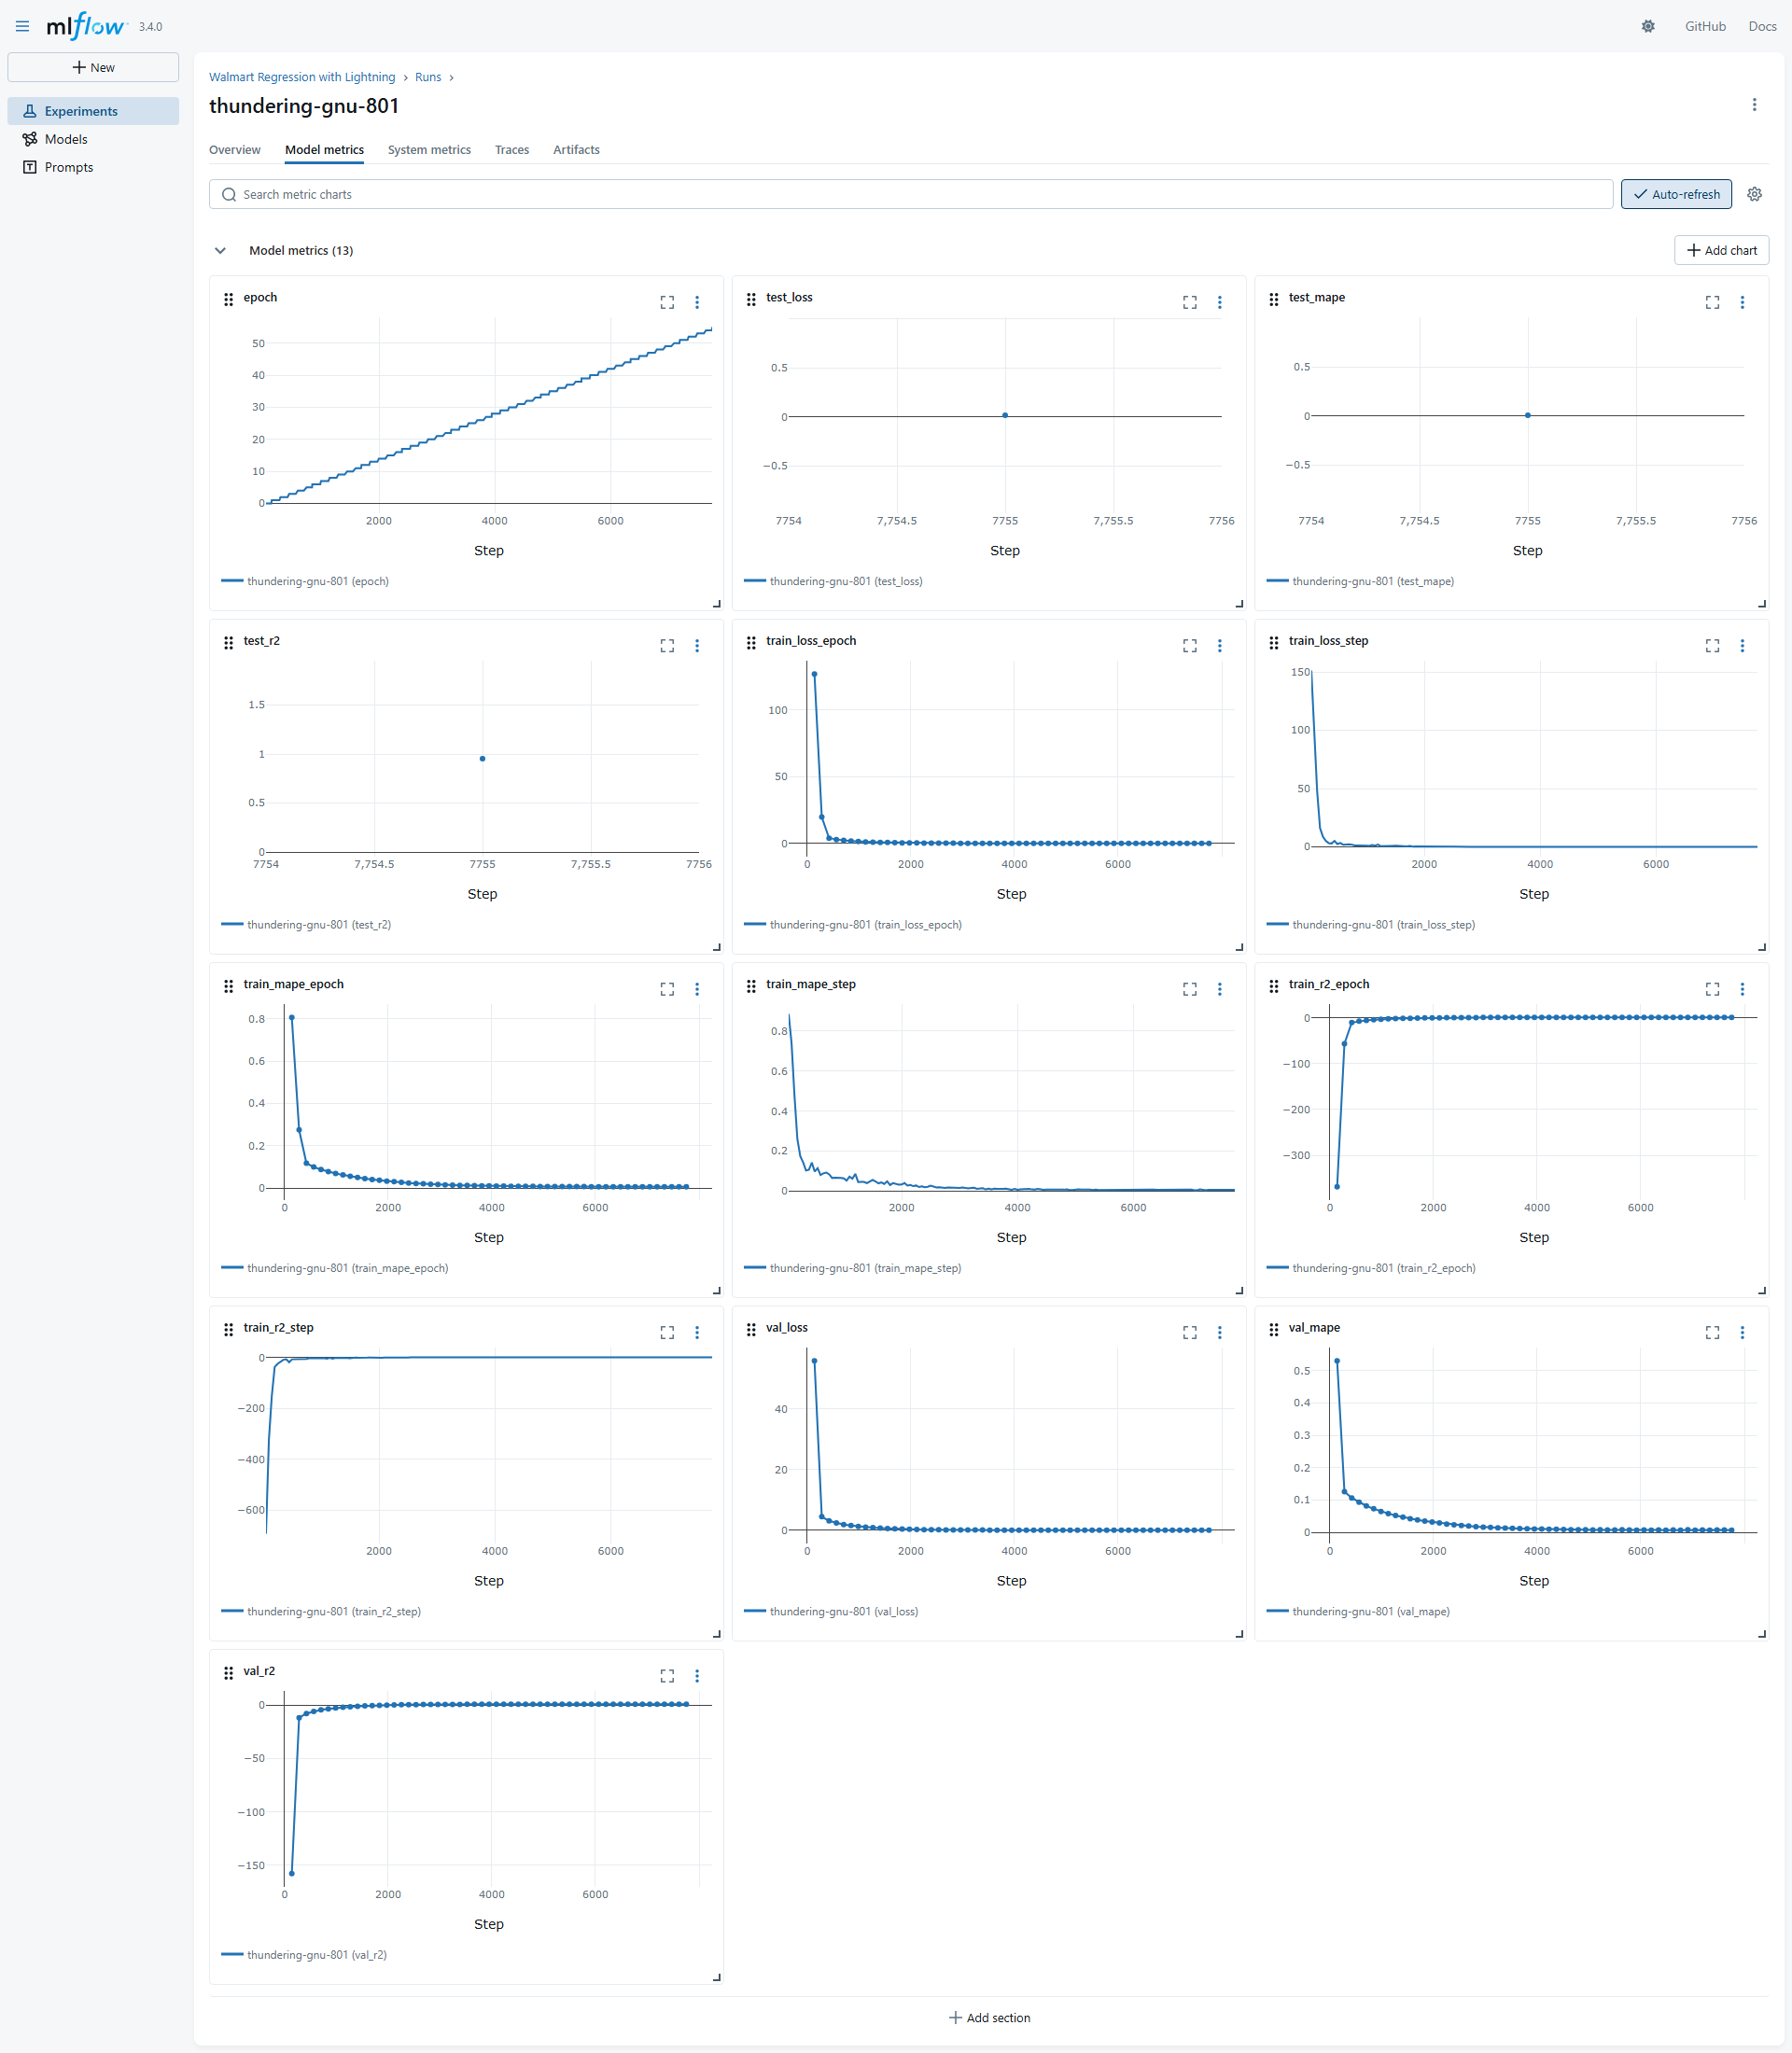

: 

In [ ]:
experiment_name = "Walmart Regression with Lightning"    
mlflow_logger = MLFlowLogger(
    experiment_name=experiment_name,
    tracking_uri="file:./mlruns"
)
    
data_module = WalmartDataModule(data_path='Walmart.csv', batch_size=32)

model = RegressionLightningModule(
    n_inputs=6, 
    h_hidden=128, 
    learning_rate=0.001
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode='min',
    # min_delta = 1e-2
)
    
trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[early_stop_callback],
    logger=mlflow_logger
)
    
trainer.fit(model, datamodule=data_module)
trainer.test(model, datamodule=data_module)

run_id = trainer.logger.run_id
experiment_id = trainer.logger.experiment_id

run_url = f"http://localhost:{port}/#/experiments/{experiment_id}/runs/{run_id}"
screenshot_path = f"images/run_{run_url.split('/')[-1]}_metrics.png"

try:
    run_screenshot_script(run_url+ "/model-metrics", screenshot_path,1920,2200)
    display(Image(filename=screenshot_path))
except Exception as e:
    print(f"Failed to generate or display the screenshot: {e}")

mlflow.end_run()